**Import the required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Categorical Vs Categorical**

In [2]:
# Column name: Continent
# Output Column: case_status

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [8]:
# I want to know of 16861 members how many got the visa
# We are analysing continent and case status
# continent == asia and case_status is 35
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con = con1 & con2
visa_df[con]


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [9]:
len(visa_df[con])

11012

In [13]:
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = visa_df['case_status'] == 'Denied'
cert_con = con1 & con2
dined_con = con1 & con3
len(visa_df[cert_con]),len(visa_df[dined_con])
print("No of asia peoples got the visa",len(visa_df[cert_con]))
print("No of asia peoples rejected the visa",len(visa_df[dined_con]))

No of asia peoples got the visa 11012
No of asia peoples rejected the visa 5849


In [14]:
labels = visa_df['continent'].value_counts().keys()

for i in labels:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    cert_con = con1 & con2
    dined_con = con1 & con3
    len(visa_df[cert_con]),len(visa_df[dined_con])
    print(f"{len(visa_df[cert_con])} of asia peoples got the visa of {i}")
    print(f"{len(visa_df[dined_con])} of asia peoples rejected the visa {i}")

11012 of asia peoples got the visa of Asia
5849 of asia peoples rejected the visa Asia
2957 of asia peoples got the visa of Europe
775 of asia peoples rejected the visa Europe
2037 of asia peoples got the visa of North America
1255 of asia peoples rejected the visa North America
493 of asia peoples got the visa of South America
359 of asia peoples rejected the visa South America
397 of asia peoples got the visa of Africa
154 of asia peoples rejected the visa Africa
122 of asia peoples got the visa of Oceania
70 of asia peoples rejected the visa Oceania


In [24]:
labels = visa_df['continent'].value_counts().keys()
array_cert = []
array_dinied = []
for i in labels:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    cert_con = con1 & con2
    dined_con = con1 & con3
    array_cert.append(len(visa_df[cert_con]))
    array_dinied.append(len(visa_df[dined_con]))

print(array_cert)
print(array_dinied)
df1 = pd.DataFrame(zip(labels,array_cert,array_dinied),
                  columns=['Continent','Certified','Denied'])
df1

[11012, 2957, 2037, 493, 397, 122]
[5849, 775, 1255, 359, 154, 70]


,Continent,Certified,Denied
0,Asia,11012,5849
1,Europe,2957,775
2,North America,2037,1255
3,South America,493,359
4,Africa,397,154
5,Oceania,122,70


In [25]:
df1 = pd.DataFrame(zip(labels,array_cert,array_dinied),
                  columns=['Continent','Certified','Denied'])
df1.set_index('Continent')

,Certified,Denied
Continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


In [4]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
result1 = pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

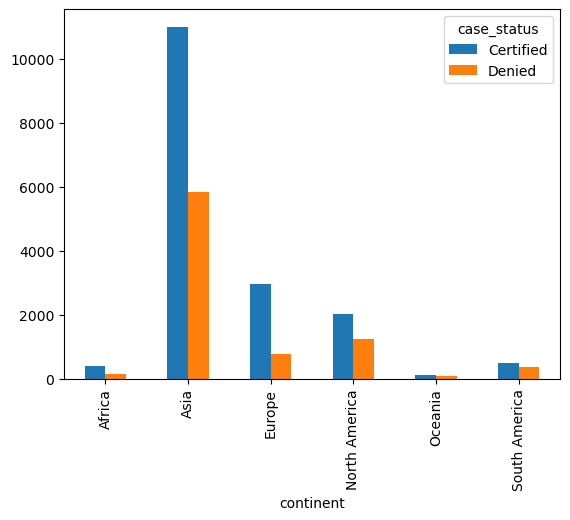

In [5]:
result1.plot(kind='bar')

In [7]:
# cotinent, educationof employee and case status
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
#Multi-variate-analysis
col1 = visa_df['continent']
col2 = [visa_df['case_status'], 
        visa_df['education_of_employee']]
result2 = pd.crosstab(col1,col2)
result2

# col1 is generally index
# col2 is column

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [9]:
visa_df['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [ ]:
# From Asia 16k applied for visa
# In that 11k got the visa 5k rejected
# in that 11k how many HS,M,B,D
# in 5k hoe many HS,M,B,D

In [13]:
col1 = visa_df['case_status']
col2 = [visa_df['continent'], 
        visa_df['education_of_employee']]
result3 = pd.crosstab(col1,col2)
result3

# col1 is generally index
# col2 is column

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='continent'>

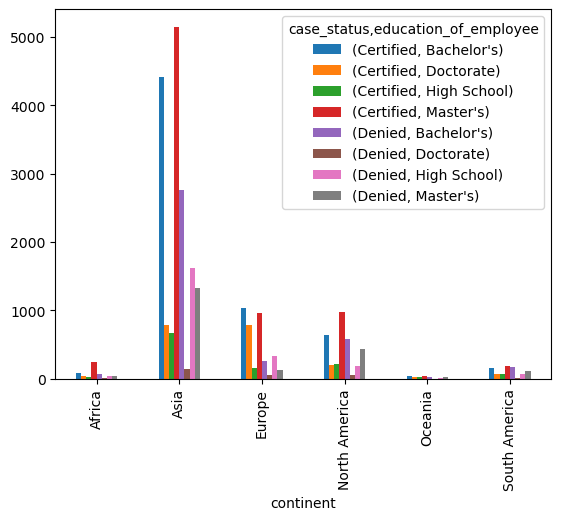

In [14]:
result2.plot(kind='bar')

In [15]:
col1 = visa_df['education_of_employee']
col2 = [visa_df['continent'], 
        visa_df['case_status']]
result4 = pd.crosstab(col1,col2)
result4

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='education_of_employee'>

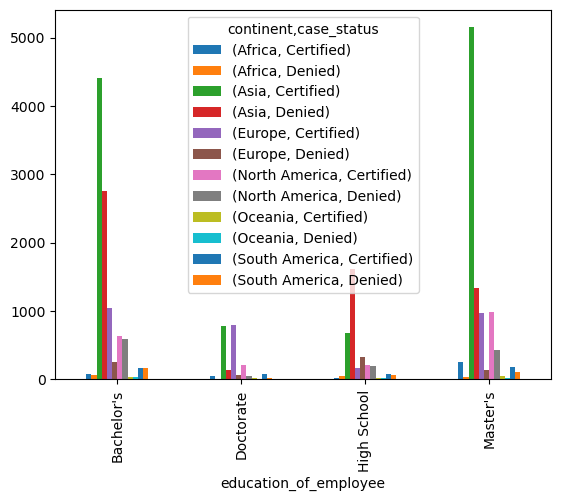

In [17]:
result4.plot(kind='bar')

**Numerical vs Numerical**

$Scatter$-$plots$:

   - plt.scatter
    
   - Will take 2 arguments x-axis and y-axis
    
   - Both variables should be numerical
    
   - It provides relation ship between 2 variables
    
        - Positively related
        
        - Negatively related
        
        - No relation

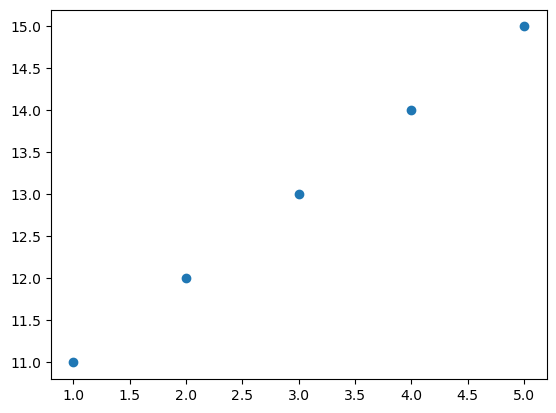

In [18]:
x = [1,2,3,4,5]
y= [11,12,13,14,15]

#(1,11) (2,12) (3,13) (4,14) (5,15)
plt.scatter(x,y)

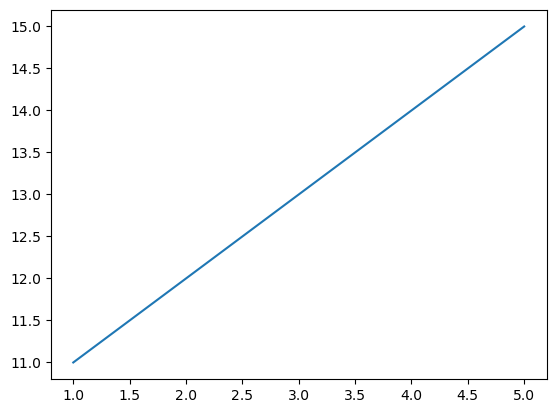

In [19]:
plt.plot(x,y)

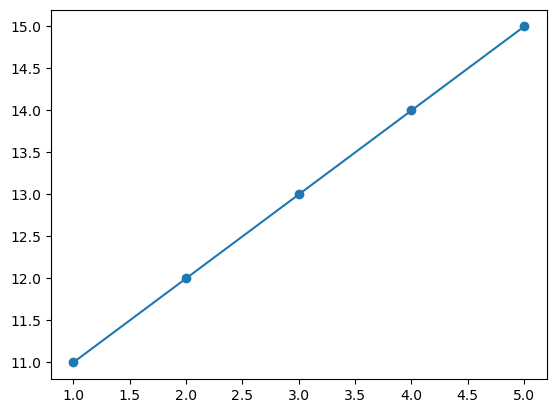

In [20]:
plt.scatter(x,y)
plt.plot(x,y)

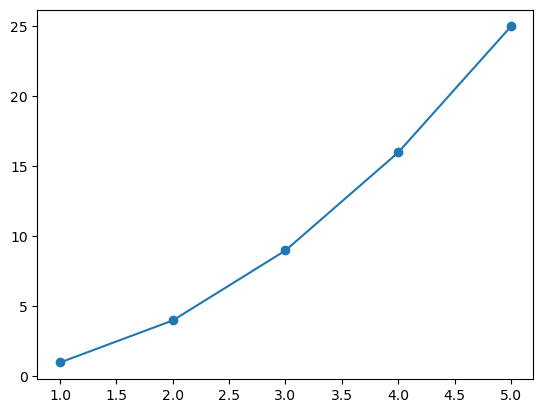

In [22]:
x = [1,2,3,4,5]
y = []
for i in x:
    y.append(i * i)

plt.scatter(x,y)
plt.plot(x,y)

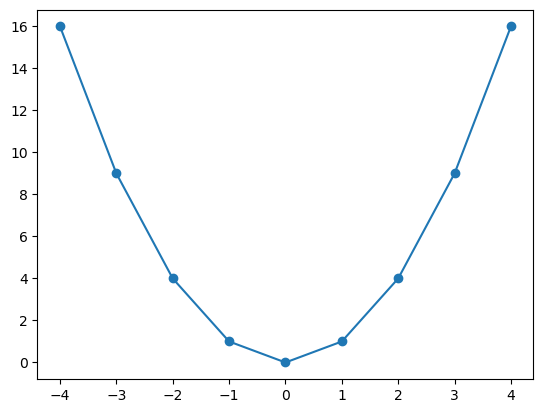

In [24]:
x = [i for i in range(-4,5)]
y = [(i * i) for i in x]
plt.scatter(x,y)
plt.plot(x,y)

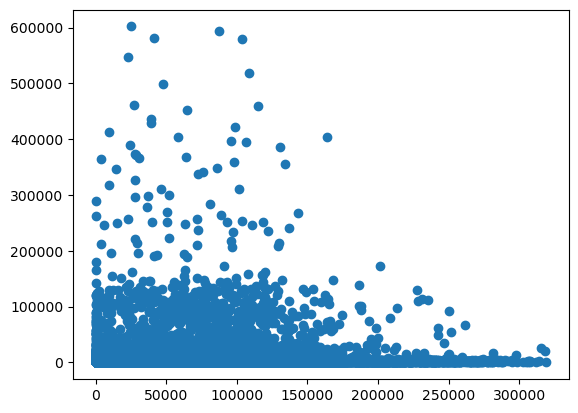

In [31]:
x = visa_df['prevailing_wage']
y = visa_df['no_of_employees']
plt.scatter(x,y)
#plt.plot(x,y)

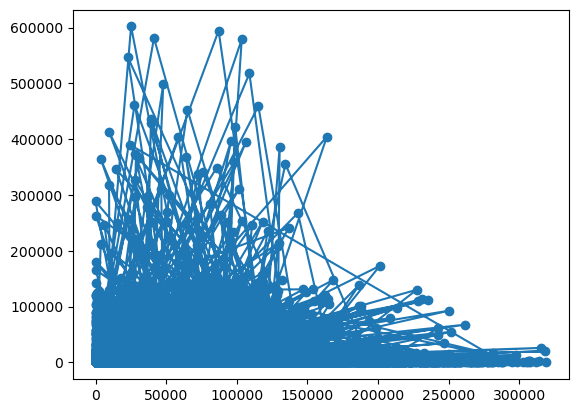

In [32]:
x = visa_df['prevailing_wage']
y = visa_df['no_of_employees']
plt.scatter(x,y)
plt.plot(x,y)

**Correlation - Coefiecient**

   - Dented with r
   - Pearson correlation coefficent
   - r varies from -1 to 1
   - r = -1 to 0 : Negatively correlated
   - r = 0 to 1 : Positively correlated
   - r = 0 : No relation 
        
        

In [33]:
# visa_df is your dataframe name 
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


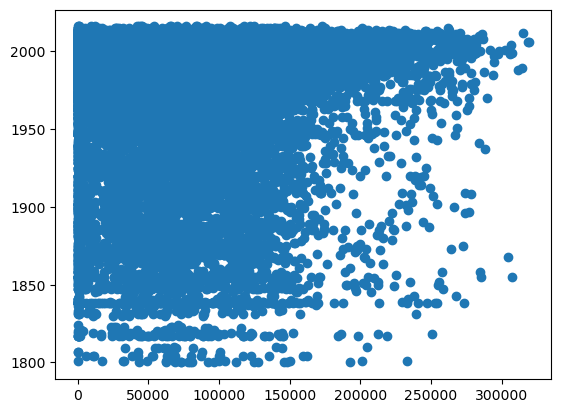

In [41]:
col1 = visa_df['prevailing_wage']
col2 = visa_df['yr_of_estab']
# result5 = pd.crosstab(col1,col2)
# result5.corr(numeric_only=True)
plt.scatter(col1,col2)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\winequality_red.csv"
wine_df = pd.read_csv(file_path)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

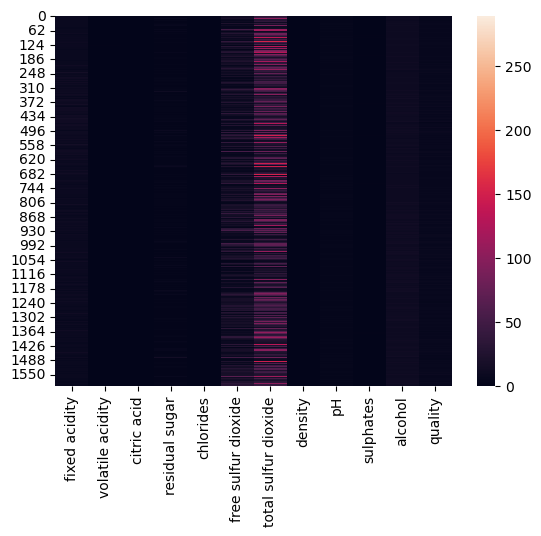

In [40]:
sns.heatmap(wine_df)

$Heatmap$

In [ ]:
#sns.heatmap(<cov matrix>)
# heat map avaialble from seaborn package
# Line your right side min = 0    max = 1
# entire matrix value ranges 0 to 1

<Axes: >

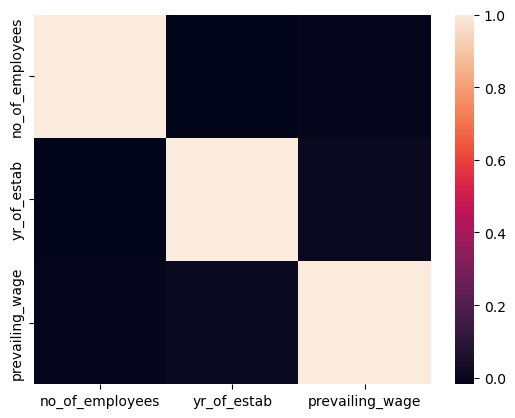

In [43]:
corr = visa_df.corr(numeric_only=True)
sns.heatmap(corr)

<Axes: >

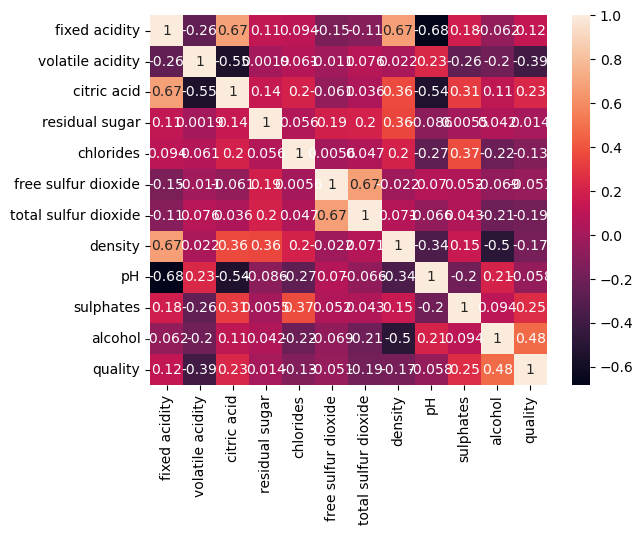

In [46]:
corr = wine_df.corr(numeric_only=True)
sns.heatmap(corr, 
            annot=True)

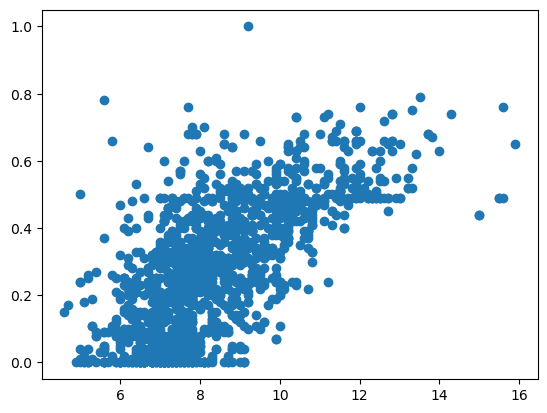

In [47]:
plt.scatter(wine_df['fixed acidity'],
           wine_df['citric acid'])

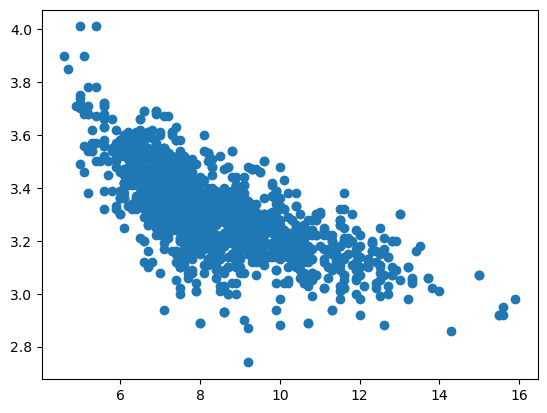

In [48]:
plt.scatter(wine_df['fixed acidity'],
           wine_df['pH'])

<Axes: >

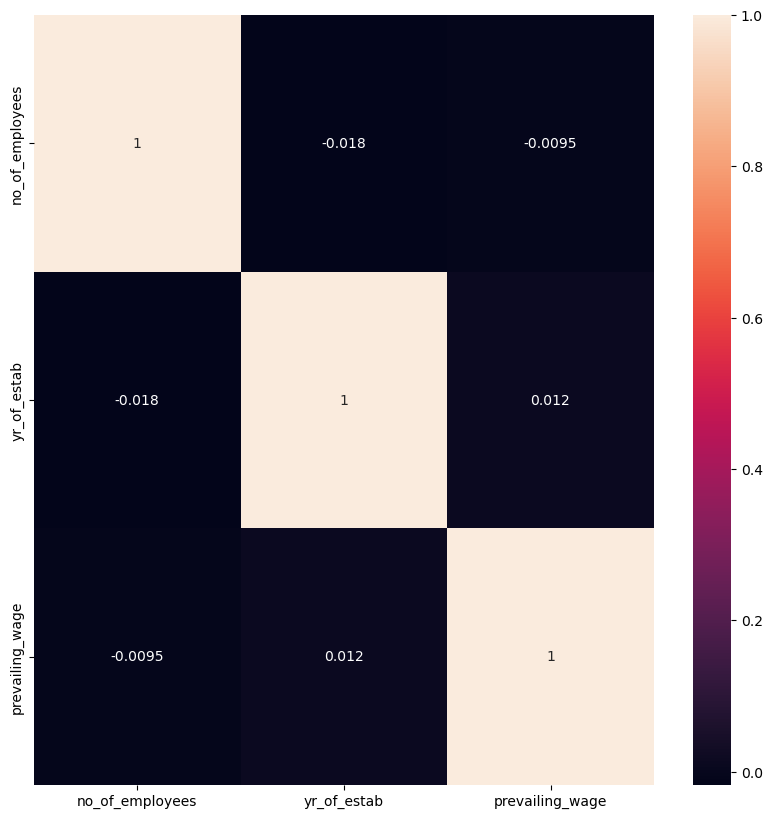

In [49]:
plt.figure(figsize=(10,10))
corr = visa_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [ ]:
68 -95 - 99

u-1sigma to u+2sigma

mean
std
v1 = u - 1sigma
v2 = u + 1sigma

c1=visa_df['prevailing_wage'] > v1
c2 = visa_df['prevailing_wage'] < v2
c1&c2

**EDA-Session1**
    - We just read the data
    
    - How to create data frames using list and dict
    
    - How to add new column
    
    - How to add new rows
    
    - How to drop columns and rows
    
    - How to change the index
    
    - How to save the data frame local
    
**EDA-Session2**

    - We read the data
    - shape,size,len,head,tail
    - columns, dtypes,info
    - Seperated Cat and nuerical Columns
    
**EDA-Session3**: Categorical colmun analysis
    - We read  categorical column
    - Unique and nunique
    - Value counts
    - Frequency table
    - bar plot and pi chart
    
**EDA-Session4**: Numerical colmun analysis
    - We read  categorical column
    - We calculate  all statistical measurements
        - mean
        - median
        - count
        - std
        - max, min
        - 25p 50p 75p
    -Histogram
    - Distribution plot for outliers
    - bar plot and pi chart
    
**EDA-Session5**: Outlier analysis
    - We read  categorical column
    
    
**EDA-Session6**: Outlier analysis
    - We read  categorical column
    